# Introduction to MCDM

**Multi-Criteria Decision Making (MCDM)** is a mathematical framework for evaluating and ranking multiple alternatives based on multiple criteria. It combines **objectives** (e.g., minimizing or maximizing) and **importance weights** to guide decision-making using ranking algorithms.

In principle, MCDM involves:
1. **Normalization**: Converting criteria values to a comparable scale using methods like linear normalization.
2. **Performance Scoring**: Applying different algorithms to determine alternative rankings, Examples of MCDM methods are:
   - **SAW**: A simple and intuitive method that computes weighted scores for alternatives.
   - **TOPSIS**: Balances the distance to the ideal and worst solutions and .. perfrms 
   - **VIKOR**: Focuses on minimizing the worst-performing criterion, ideal for risk-averse decisions.
   - **Compromise**: rankings provide a balanced decision by combining outputs from multiple MCDM methods.
3. **Distance Metrics**: Some methods rely on distances from optimal and non-optimal values.
4. **Pareto Optimality**: Considers solutions where improving one criterion requires compromising another.

Different MCDM methods have unique strengths and cater to varying decision-making preferences or risk appetites. For example, TOPSIS seeks a balanced approach, while VIKOR emphasizes avoiding the worst outcomes for any criteria.

The **CLIMADA** MCDM module helps users evaluate alternatives and structure decision-making. By default: **Weights**: Equal unless specified. **Objectives**: Maximized. **Methods**: Includes SAW, TOPSIS, and VIKOR.
Users can customize analyses by adjusting normalization methods, distance metrics, and criteria weights.

The MCDM can also work as a support to guide the discussion and analysis; what crietria are we looking at? How can we measure it? How do we value these crietria in realtion to each other?

Explore the following sections for details: **Normalization Methods**:  **Distance Metrics**: **MCDM Methods**:**Compromise Rankings**: Balancing results across methods.

### References
- *TOPSIS: A Multi-Attribute Decision Making Method* (Hwang & Yoon, 1981)
- *Multiple Criteria Decision Analysis* (Figueira et al., 2005)


# Bike example

In [ ]:
What are the questions that one might ask as they perform the MCDM analysis and demonstrates why certain choises should be made?

Make a simple bike example of all the parts and then refactor it. The bike is supposed to work as a analagy of any decsion making process. 


Storyline

0. Straightforward (no understanding, show simplicity and default setting)
1. Simple Bike - Analysis
    - Why does it choose
    - Weight Sensitivty (Vanity or Durability)
    - Pareto optimal (tables, later plots)
    - Weight Helpers
    - Constraints
2. Simple Bike - Groups
    - Comfort is different among users (weight based on ... ?) 
    - All criteria based different voting of family
3. Simple Bike - Climate Change


### Utility functions

In [ ]:
# Make a utiltiy function to compare attributes between the original and refactored classes
def compare_attributes(obj1, obj2):
    """
    Compares attributes between two objects and prints differences.

    Parameters:
    - obj1: The first object to compare.
    - obj2: The second object to compare.

    Returns:
    None. Prints results directly.
    """
    obj1_attrs = vars(obj1)
    obj2_attrs = vars(obj2)
    
    differences = []
    for key in obj1_attrs:
        if key in obj2_attrs:
            value1 = obj1_attrs[key]
            value2 = obj2_attrs[key]
            
            # Handle DataFrame comparison
            if isinstance(value1, pd.DataFrame) and isinstance(value2, pd.DataFrame):
                if not value1.equals(value2):
                    differences.append(f"DataFrame mismatch in attribute '{key}'")
            
            # Handle Series comparison
            elif isinstance(value1, pd.Series) and isinstance(value2, pd.Series):
                if not value1.equals(value2):
                    differences.append(f"Series mismatch in attribute '{key}'")
            
            # Handle list comparison
            elif isinstance(value1, list) and isinstance(value2, list):
                if value1 != value2:
                    differences.append(f"List mismatch in attribute '{key}'")
            
            # Handle dictionary comparison
            elif isinstance(value1, dict) and isinstance(value2, dict):
                for subkey in set(value1.keys()).union(value2.keys()):
                    if subkey not in value1:
                        differences.append(f"Key '{subkey}' missing in dictionary attribute '{key}' for obj1")
                    elif subkey not in value2:
                        differences.append(f"Key '{subkey}' missing in dictionary attribute '{key}' for obj2")
                    else:
                        val1 = value1[subkey]
                        val2 = value2[subkey]
                        if isinstance(val1, pd.DataFrame) and isinstance(val2, pd.DataFrame):
                            if not val1.equals(val2):
                                differences.append(f"DataFrame mismatch in dictionary attribute '{key}' for subkey '{subkey}'")
                        elif isinstance(val1, pd.Series) and isinstance(val2, pd.Series):
                            if not val1.equals(val2):
                                differences.append(f"Series mismatch in dictionary attribute '{key}' for subkey '{subkey}'")
                        elif val1 != val2:
                            differences.append(f"Value mismatch in dictionary attribute '{key}' for subkey '{subkey}': {val1} != {val2}")
            
            # Handle None values
            elif value1 is None and value2 is None:
                continue  # Both are None, so they match
            
            # Mismatched types or fallback for other types
            elif type(value1) != type(value2):
                differences.append(f"Type mismatch for attribute '{key}': {type(value1)} != {type(value2)}")
            else:
                if value1 != value2:
                    differences.append(f"Value mismatch in attribute '{key}': {value1} != {value2}")
        
        else:
            differences.append(f"Attribute '{key}' missing in obj2")
    
    for key in obj2_attrs:
        if key not in obj1_attrs:
            differences.append(f"Attribute '{key}' missing in obj1")
    
    # Print results
    if not differences:
        print("All attributes match between the original and refactored versions.")
    else:
        print("Differences found in attributes:")
        for diff in differences:
            print(diff)




## 1. Bike - Default Ranking 

We begin by making a simple bike example and make a straightforward ranking based on equal weighting and the four default MCDM methods

1.1 - Define the data frame 

In [1]:
import pandas as pd
import tabulate as tb
import numpy as np

# Define the data 
data = {
    "Design (# friends approve)": [3, 7, 1, 5, 2, 1],  
    "Max Speed (km/h)": [25.1, 42.5, 62, 30, 20, 15],  
    "Comfort (Minutes until pain)": [60, 20, 5, 30, 15, 10], 
    "Durability (Years)": [5, 3, 10, 4, 2, 1] 
    }

# Create the DataFrame
metrics_df = pd.DataFrame(data)

# Display the DataFrame as tabular data
print('The DataFrame as tabular data:')
print(tb.tabulate(metrics_df, headers='keys', tablefmt='pretty'))



The DataFrame as tabular data:
+---+----------------------------+------------------+------------------------------+--------------------+
|   | Design (# friends approve) | Max Speed (km/h) | Comfort (Minutes until pain) | Durability (Years) |
+---+----------------------------+------------------+------------------------------+--------------------+
| 0 |            3.0             |       25.1       |             60.0             |        5.0         |
| 1 |            7.0             |       42.5       |             20.0             |        3.0         |
| 2 |            1.0             |       62.0       |             5.0              |        10.0        |
| 3 |            5.0             |       30.0       |             30.0             |        4.0         |
| 4 |            2.0             |       20.0       |             15.0             |        2.0         |
| 5 |            1.0             |       15.0       |             10.0             |        1.0         |
+---+----------

1.1 - Define the Decision Matrix and rank

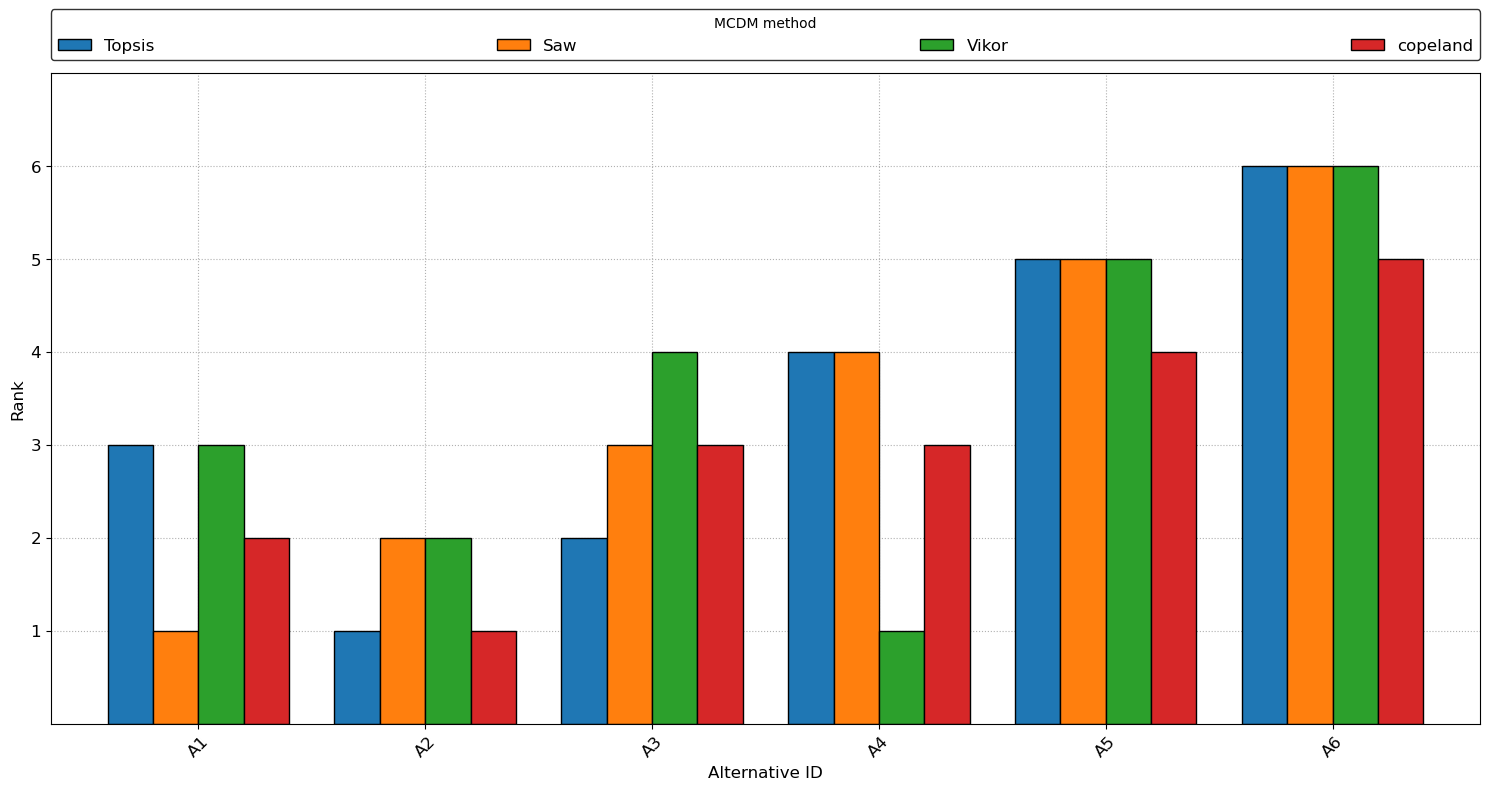

In [2]:
#from MCDM.DecisionMatrix import DecisionMatrix  # Import DecisionMatrix module
from MCDM.MCDM_dev import DecisionMatrix

# Create the DecisionMatrix object
dm = DecisionMatrix(metrics_df=metrics_df)

# Rank the alternatives
ranks_output = dm.calc_rankings()

# Display the rankings
ranks_output.plot_ranks()

The compromised approach points to A2. Is it clear why the following bikes were ranked in this order? How can we support the decision-maker in understanding why this ranking was achieved?

When using a Multi-Criteria Decision-Making (MCDM) framework, decision-makers often face additional questions to ensure confidence in their choices and effectively communicate decisions. For example:
- "How can we fairly incorporate multiple stakeholders' preferences?"
- "What if the chosen alternative performs poorly under the worst-case scenario?"

**Key Considerations in MCDM Analysis**

| **Consideration**       | **Example**                              | **Approach**                                   |
|--------------------------|------------------------------------------|-----------------------------------------------|
| **Constraints**          | Budget, Regulations                     | Filter out non-satisfactory alternatives      |
| **Uncertainties**        | Future climate, Cost estimations        | Rank probability distribution, Scenario evaluation |
| **Groups**               | Socio-economic, Regions, Species        | Assess groups individually, Group-weighted criteria |
| **Preferences**          | Risk-tolerance, People vs Assets, Stakeholder differences | Weight sensitivity, Weighted aggregation, Prioritization (e.g., AHP) |
| **Pareto-Optimality**    | Conflicting criteria (e.g., Cost vs Speed)  | Identify Pareto-optimal alternatives, Criteria trade-offs |

Effective communication of MCDM results is essential. By visualizing trade-offs, presenting criteria weights, and providing clear reasoning, decision-makers can build trust and ensure buy-in from stakeholders.


## 2 Bike - Analytical Approach (weights, preference, constraints, pareto optimal)

1.1 - Add some additional data to data frame

In [6]:
import pandas as pd
import tabulate as tb
import numpy as np

# Lets first add some more data to the DataFrame
metrics_df.insert(0, "Bike", ["Urban Commuter", "Mountain Rider", "Speed Racer", "Eco-Friendly", "Classic Cruiser", "Hipster Fixie"]) if "Bike" not in metrics_df.columns else None # To get a better idea of the bikes
metrics_df.insert(1, 'Cost (CHF)', [100, 500, 1000, 700, 300, 200]) if 'Cost (CHF)' not in metrics_df.columns else None # Add cost column

1.2 - Define the decision matrix and view the attributes

In [7]:
# Parameters
params = {
    "metrics_df": metrics_df, # The DataFrame with the metrics
    "alt_cols": ['Bike'], # Determine which columns are alternatives (mandatory in this case since criteria columsn must be numeric)
    "objectives": { "Cost (CHF)": -1 }, # Minimize, since the default is to maximize
    "crit_cats": {"Vanity": ["Design (# friends approve)", "Max Speed (km/h)"], 
                  "Practicality": ["Cost (CHF)", "Durability (Years)"]} # Define categories for the criteria (optional, but helps with organization)
}

# Create the DecisionMatrix object
dm = DecisionMatrix(**params)

# Display the attributes of the DecisionMatrix object (these are structured to help with the organization of the MCDM process)
dm.print_dm()

Decision Matrix:
+---+----------------+-----------------+------------+----------------------------+------------------+------------------------------+--------------------+
|   | Alternative ID |      Bike       | Cost (CHF) | Design (# friends approve) | Max Speed (km/h) | Comfort (Minutes until pain) | Durability (Years) |
+---+----------------+-----------------+------------+----------------------------+------------------+------------------------------+--------------------+
| 0 |       A1       | Classic Cruiser |    300     |             2              |       20.0       |              15              |         2          |
| 1 |       A2       |  Eco-Friendly   |    700     |             5              |       30.0       |              30              |         4          |
| 2 |       A3       |  Hipster Fixie  |    200     |             1              |       15.0       |              10              |         1          |
| 3 |       A4       | Mountain Rider  |    500     |      

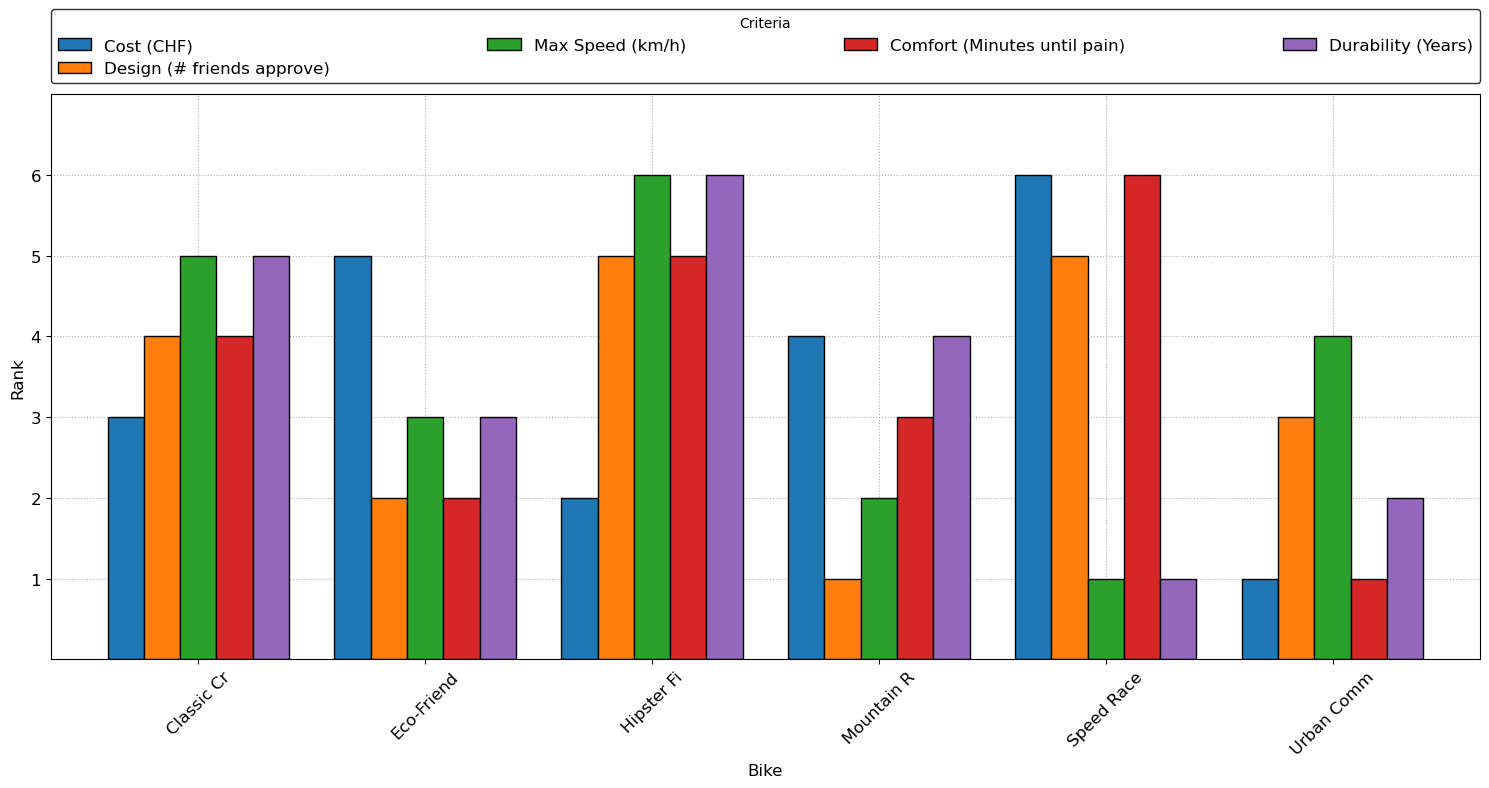

In [8]:
dm.calc_rankings().plot_ranks(rank_type='criteria')

1.2 In MCDM one normalizes the criteria before applying the MCDM methods (the default normalization method is ... )

Pareto optimality and understanding teh concept of trade-off, whic leads to weightining ...

+---+-----------------+------------+----------------------------+------------------+------------------------------+--------------------+-------------------------------------------------------+----------------+----------------+
|   |      Bike       | Cost (CHF) | Design (# friends approve) | Max Speed (km/h) | Comfort (Minutes until pain) | Durability (Years) |                     Dominated By                      | Dominance Rank | Pareto Optimal |
+---+-----------------+------------+----------------------------+------------------+------------------------------+--------------------+-------------------------------------------------------+----------------+----------------+
| 0 | Classic Cruiser |    300     |             2              |       20.0       |              15              |         2          |          ['Eco-Friendly', 'Mountain Rider']           |       2        |     False      |
| 1 |  Eco-Friendly   |    700     |             5              |       30.0       |        

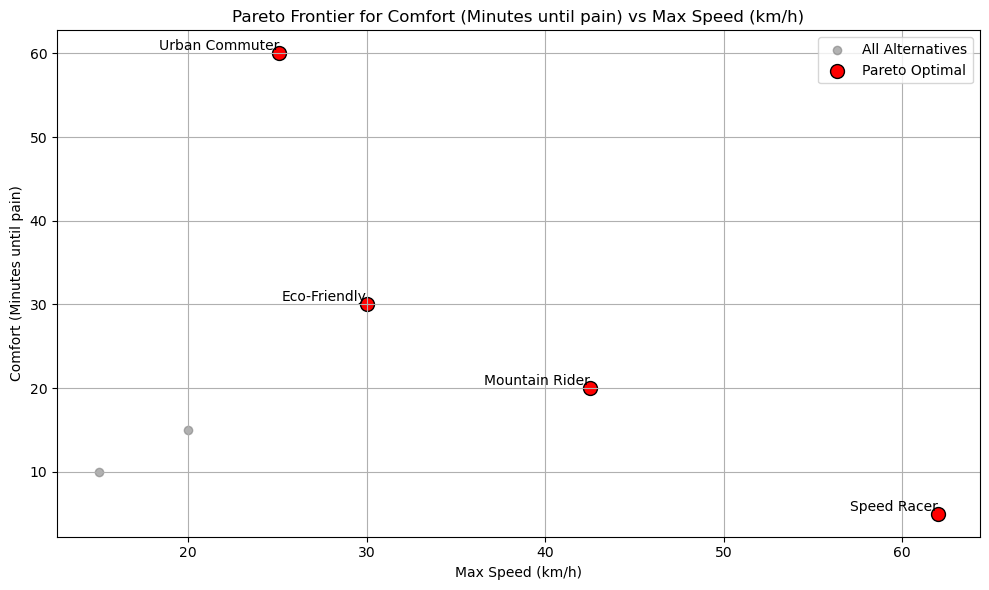

Pareto Optimal Alternatives:
+---+------------------+------------------------------+----------------+
|   | Max Speed (km/h) | Comfort (Minutes until pain) |      Bike      |
+---+------------------+------------------------------+----------------+
| 1 |       30.0       |              30              |  Eco-Friendly  |
| 3 |       42.5       |              20              | Mountain Rider |
| 4 |       62.0       |              5               |  Speed Racer   |
| 5 |       25.1       |              60              | Urban Commuter |
+---+------------------+------------------------------+----------------+


In [12]:
# Define constraints
constraints = {"Cost (CHF)": "<=500"}

# Analyze dominance and Pareto optimality for the subset
dominance_pareto_df = dm.analyze_dominance_and_pareto(constraints=constraints)

# Display results
print(tb.tabulate(dominance_pareto_df, headers='keys', tablefmt='pretty'))

# Plot Pareto frontier for a specific group and sample
dm.plot_pareto_frontier(
    criteria_x='Max Speed (km/h)',
    criteria_y='Comfort (Minutes until pain)',
    show_table=True
)

In [ ]:
# Plot the normalized decision matrix
dm.plot_norm_criteria_values()

# You can also plot the rankings for each alternative
# ranks_output = dm.calc_rankings()

# Pareto  optimal set

1.3 - Lets help the user set the weights

An important and helpful way to understand is that weights represent **relative** importance. So you allocate a total sum of 1. This can be little tricky to understand so we can make use of different methods ... .

However, to actually arrive at a ranking lets make use of some helper functions ... which are  based on ...

In [ ]:
from MCDM.utils.weights_helpers_utils import weight_from_scale

# Set the importance of the criteria as a scale (1 to 5 is default)
criteria_scale = { "Cost (CHF)": 5, "Durability (Years)": 4, "Design (# friends approve)": 3, "Max Speed (km/h)": 2, "Comfort (Minutes until pain)": 2}
weights = weight_from_scale(criteria_scale)

# Lets create a new DecisionMatrix object with the weights and display the weights
params["weights"] = weights
dm = DecisionMatrix(**params)

# Display the weights
dm.plot_criteria_weights()

# Calculate the rankings
# dm.calc_rankings().plot_ranks()

In [ ]:
from tabulate import tabulate

constraints = {'Comfort (Minutes until pain)': {'greater': 20},
                'Cost (CHF)': {'less': 800},
               }


ranks_output = dm.calc_rankings(constraints=constraints)

# Check if ranks_output has an attribute alt_exc_const_df
if hasattr(ranks_output, 'alt_exc_const_df'):
    # Print the alternatives that do not satisfy the constraints
    print("Table below shows the excluded alternatives, i.e., not satifying constraints,\nwhere True if particular constraint is satisfied and False if not.", 2*"\n.")
    print(tabulate(ranks_output.alt_exc_const_df, headers='keys', tablefmt='psql'))

# Plot the rankings
ranks_output.plot_ranks()

You can try any of the other helper functions or if you find it cumpbersume you can ... manual

'''python
    
    `from MCDM.utils.weights_helpers_utils import weight_from_ahp, weight_from_categories, manual_input_weights`

How sensitive are the weights given my current preference (weights) ..?

In [ ]:
# targets = ["Vanity", "Practicality"]

_ = dm.analyse_sens_weights()

Since all criteria is equally weighted we see that Classic Cruiser and Hipster Fixie perform well as they are quite evenly ... . How would this change if we would put more emphasize of different criteria.


**simplify this function** What is the point of it???

## Groups: Balancing Preferences and Impact in Group Decision-Making

In this example, we demonstrate how to use the **group functionality** while distinguishing between **preferences** (subjective priorities) and **impact** (objective significance).

### Scenario: Taylor and Alex Choosing a Mutual Bike
Taylor and Alex are choosing a bike they both use. While both individuals' **preferences** are equally considered, the **group weight** adjusts the importance of comfort, as Alex has a back problem, making comfort more impactful for them.

This mirrors situations where **group weight** reflects:
- **Expert judgement** (meritocratic weighting).
- **Population size or vulnerability** (e.g., ensuring poorer subgroups are fairly represented).

---

### Commune Decision-Making Analogy
Two villages collaborate on adaptation planning:
- **Preferences**: Village A prioritizes flood resilience; Village B values economic efficiency.
- **Impact**: Village A is more vulnerable to flooding (higher group weight), while Village B has a larger population (greater overall influence).

By balancing **preferences** and **impact**, this method ensures decisions consider both subjective priorities and objective significance, preventing over-reliance on total assets or population.


In [ ]:
# Data before pivoting
data = {
    "Bike": [
        "Classic Cruiser", "Classic Cruiser",
        "Eco-Friendly", "Eco-Friendly",
        "Hipster Fixie", "Hipster Fixie",
        "Mountain Rider", "Mountain Rider",
        "Speed Racer", "Speed Racer",
        "Urban Commuter", "Urban Commuter",
    ],
    "Person": ["Alex", "Taylor"] * 6,
    "Cost (CHF)": [300, 300, 700, 700, 200, 200, 500, 500, 1000, 1000, 100, 100],
    "Design (# friends approve)": [4, 4, 5, 5, 6, 6, 7, 7, 1, 1, 3, 3],
    "Max Speed (km/h)": [50.0, 50.0, 30.0, 30.0, 40.0, 40.0, 42.5, 42.5, 62.0, 62.0, 25.1, 25.1],
    "Comfort (Minutes until pain)": [50, 55, 30, 35, 45, 40, 20, 25, 5, 10, 60, 65],
    "Durability (Years)": [8, 8, 4, 4, 6, 6, 3, 3, 10, 10, 5, 5],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as tabular data
print('The DataFrame as tabular data:')
print(tb.tabulate(df, headers='keys', tablefmt='pretty'))

another analogy would be to have a an expert and personal accounting 

2.1 - Define the decision matrix

In [ ]:
# Alex's and Taylor's weights
weights_alex = {"Cost (CHF)": 0.4, "Design (# friends approve)": 0.2, "Max Speed (km/h)": 0.1, "Comfort (Minutes until pain)": 0.2, "Durability (Years)": 0.1}
weights_taylor = {"Cost (CHF)": 0.3, "Design (# friends approve)": 0.1, "Max Speed (km/h)": 0.2, "Comfort (Minutes until pain)": 0.3, "Durability (Years)": 0.1}

# Combine the weights by averaging (equal vote assumption)
combined_weights = {key: (weights_alex[key] + weights_taylor[key]) / 2 for key in weights_alex}

print("Combined Weights:", combined_weights)

In [ ]:
# Create the DecisionMatrix object
params["metrics_df"] = df
params["group_cols"] = ["Person"]
params["group_weights"] = {"Person": {"Alex": 0.4, "Taylor": 0.6}}
params["weights"] = combined_weights

# Create the DecisionMatrix object
dm = DecisionMatrix(**params)

# Plot the criteria weights
dm.plot_criteria_weights()

# # Plot the 
dm = dm.pivot_and_reweight_criteria("Person")
dm.print_dm()

# # Plot the criteria weights
dm.plot_criteria_weights()


1.2 - Define the decision matrix

1.3 - Rank the alternatives

| Normalization Method       | Description                                                                 | Value Distribution (0-1 Bucketing)                                                                                     |
|----------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| **linear_normalization**    | Normalize decision matrix using a linear scale.                           | Distributes values linearly across the 0–1 range based on the lowest and highest values in the dataset.                |
| **minmax_normalization**    | Normalize decision matrix using minimum-maximum normalization.            | Maps the minimum value to 0 and the maximum value to 1, with values proportionally placed in between.                  |
| **max_normalization**       | Normalize decision matrix using maximum normalization.                    | Divides each value by the maximum, with 0 indicating 0% of max and 1 indicating 100% of max.                           |
| **sum_normalization**       | Normalize decision matrix using sum normalization.                        | Each value is divided by the sum of all values in the criterion, so that the sum of values equals 1.                   |
| **vector_normalization**    | Normalize decision matrix using vector normalization.                     | Divides each value by the square root of the sum of squares, with values representing their proportion in 0-1 range.   |
| **multimoora_normalization**| Normalize decision matrix using a combined normalization method for Moora.| Various transformations; generally scales based on vector magnitude and retains relative proportions.                  |


In [ ]:
import pandas as pd
import numpy as np
import tabulate as tb

# Original data before adding uncertainty variables
data = {
    "Bike": [
        "Classic Cruiser", "Classic Cruiser",
        "Eco-Friendly", "Eco-Friendly",
        "Hipster Fixie", "Hipster Fixie",
        "Mountain Rider", "Mountain Rider",
        "Speed Racer", "Speed Racer",
        "Urban Commuter", "Urban Commuter",
    ],
    "Person": ["Alex", "Taylor"] * 6,
    "Cost (CHF)": [300, 300, 700, 700, 200, 200, 500, 500, 1000, 1000, 100, 100],
    "Design (# friends approve)": [4, 4, 5, 5, 6, 6, 7, 7, 1, 1, 3, 3],
    "Max Speed (km/h)": [50.0, 50.0, 30.0, 30.0, 40.0, 40.0, 42.5, 42.5, 62.0, 62.0, 25.1, 25.1],
    "Comfort (Minutes until pain)": [50, 55, 30, 35, 45, 40, 20, 25, 5, 10, 60, 65],
    "Durability (Years)": [8, 8, 4, 4, 6, 6, 3, 3, 10, 10, 5, 5],
}

# Define scenarios for Climate and Location
scenarios = pd.DataFrame(
    [(c, l) for c in ["Cold", "Hot"] for l in ["Urban", "Rural"]],
    columns=["Climate", "Location"]
)

# Create the complete DataFrame with all scenario combinations
df = pd.DataFrame(data).merge(scenarios, how="cross")

# Apply scenario-based effects
np.random.seed(42)  # For reproducibility
df["Durability (Years)"] += np.random.uniform(-2, 2, len(df)) + (df["Climate"] == "Cold").astype(int)
df["Comfort (Minutes until pain)"] += np.random.uniform(-5, 5, len(df)) + (df["Location"] == "Urban").astype(int) * -2
df["Max Speed (km/h)"] += np.random.uniform(-3, 3, len(df)) + (df["Climate"] == "Hot").astype(int) * 1.5

# Round numerical columns
df[["Durability (Years)", "Comfort (Minutes until pain)", "Max Speed (km/h)"]] = df[
    ["Durability (Years)", "Comfort (Minutes until pain)", "Max Speed (km/h)"]
].round(1)

# Display the resulting DataFrame
print('The DataFrame with Climate and Location effects:')
print(tb.tabulate(df, headers='keys', tablefmt='pretty'))

# Check uniqueness of key columns
print("\nNumber of unique rows based on ['Bike', 'Person', 'Climate', 'Location']:", len(df.drop_duplicates(subset=["Bike", "Person", "Climate", "Location"])))


In [ ]:
# Define parameters
params = {
    "metrics_df": df,
    "alt_cols": ["Bike"],
    "group_cols": ["Person"],
    "unc_cols": ["Climate", "Location"]
}

# Create the DecisionMatrix object
dm = DecisionMatrix(**params)

dm.print_dm()


In [ ]:
dm.plot_norm_criteria_values()